In [1]:
import numpy as np 
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv(r"G:/REG data set/1M.csv")

In [3]:
print(df)

         fare_amount            pickup_datetime  pickup_longitude  \
0                7.0  2013-07-02 19:54:00+00:00        -74.005360   
1                6.9  2012-04-05 05:50:00+00:00        -74.007443   
2               14.0  2015-05-17 08:02:59+00:00        -73.979210   
3               10.0  2014-10-17 08:28:00+00:00        -73.991797   
4                5.0  2013-05-10 16:39:08+00:00        -73.971696   
...              ...                        ...               ...   
1108713         11.7  2011-05-16 21:18:46+00:00          0.000000   
1108714          8.5  2009-09-11 23:37:00+00:00        -73.978357   
1108715         13.3  2011-01-08 11:25:06+00:00        -73.950348   
1108716         18.5  2013-06-26 11:33:55+00:00        -73.974344   
1108717          5.0  2015-05-17 00:27:40+00:00        -73.974289   

         pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0              40.728867         -74.008913         40.710907                1  
1        

In [4]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1


In [5]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108718 entries, 0 to 1108717
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1108718 non-null  float64
 1   pickup_datetime    1108718 non-null  object 
 2   pickup_longitude   1108718 non-null  float64
 3   pickup_latitude    1108718 non-null  float64
 4   dropoff_longitude  1108714 non-null  float64
 5   dropoff_latitude   1108714 non-null  float64
 6   passenger_count    1108718 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.2+ MB


In [7]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.108718e+06,1.108718e+06,1.108718e+06,1.108714e+06,1.108714e+06,1.108718e+06
mean,1.135471e+01,-7.250414e+01,3.990661e+01,-7.250897e+01,3.991603e+01,1.686511e+00
std,9.783979e+00,1.160507e+01,1.069779e+01,1.175224e+01,9.041265e+00,1.309449e+00
min,-6.700000e+01,-2.343511e+03,-3.447915e+03,-1.616112e+03,-3.446129e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073487e+01,-7.399138e+01,4.073405e+01,1.000000e+00
50%,8.500000e+00,-7.398179e+01,4.075263e+01,-7.398013e+01,4.075318e+01,1.000000e+00
75%,1.250000e+01,-7.396708e+01,4.076714e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,4.000000e+02,2.157302e+03,3.210359e+03,3.368140e+03,2.922215e+03,9.000000e+00


In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
dtype: int64

# Exploratory Data Analysis & Removing outliers
Missing Data We can use seaborn to create a simple heatmap to see where we are missing data!

In [9]:
df = df.drop(df[df.isnull().any(1)].index, axis = 0)

In [10]:
df.shape

(1108714, 7)

In [11]:
from collections import Counter
Counter(df['fare_amount']<0)

Counter({False: 1108670, True: 44})

In [12]:
df = df.drop(df[df['fare_amount']<0].index, axis=0)
df.shape

(1108670, 7)

In [13]:
df['fare_amount'].describe()

count    1.108670e+06
mean     1.135543e+01
std      9.782614e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      4.000000e+02
Name: fare_amount, dtype: float64

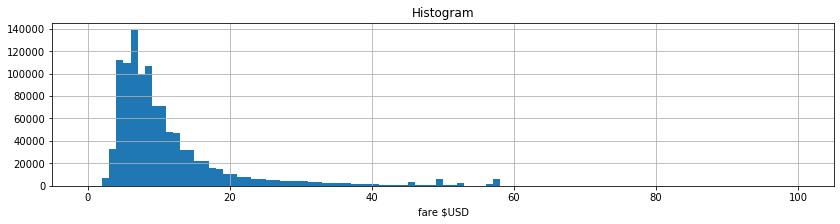

In [14]:
df[df.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

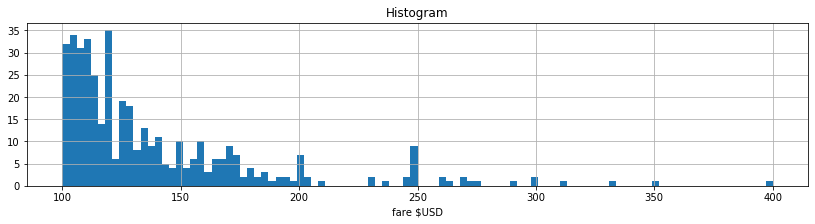

In [15]:
df[df.fare_amount>100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [16]:
df['fare_amount'].sort_values(ascending=False)

1008879    400.00
1023292    350.00
333652     333.33
682774     311.08
726952     300.00
            ...  
1094292      0.00
356337       0.00
1104148      0.00
226191       0.00
205133       0.00
Name: fare_amount, Length: 1108670, dtype: float64

In [17]:
df = df.drop(df[df['fare_amount']>500].index, axis = 0)

In [18]:
df= df.drop(df[df['fare_amount'] < 2.5].index, axis = 0)

In [19]:
df.shape

(1108627, 7)

In [20]:
df['passenger_count'].describe()

count    1.108627e+06
mean     1.686533e+00
std      1.309472e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [21]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [22]:
### df.drop(['key'], axis=1,inplace= True)

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1


In [24]:
## df.drop(['Unnamed: 0'], axis=1,inplace= True)

In [25]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1


In [26]:
df[df['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
180038,30.83,2014-11-30 22:03:54+00:00,-73.86351,40.769807,-73.950583,40.77094,9


In [27]:
df = df.drop(df[df['passenger_count']>6].index, axis = 0)

In [28]:
df['passenger_count'].describe()

count    1.108626e+06
mean     1.686526e+00
std      1.309454e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.000000e+00
Name: passenger_count, dtype: float64

In [29]:
len(df[df['passenger_count'] <= 0])

3891

In [30]:
df=df.drop(df[df['passenger_count'] <= 0].index, axis = 0)

In [31]:
df= df.drop(df[df['fare_amount'] < 2.5].index, axis = 0)

In [32]:
df.shape

(1104735, 7)

In [33]:
df[df['pickup_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
3008,25.3,2012-08-03 07:43:00+00:00,0.000000,-3116.285383,-73.953600,40.787998,1
242365,5.0,2013-02-16 21:35:00+00:00,-0.005000,-3447.915090,-73.971498,40.756038,5
319443,7.3,2011-12-27 21:29:00+00:00,-2213.073890,-2120.723877,-858.327698,-2164.052885,1
432760,7.3,2011-08-25 08:13:00+00:00,29.418397,-2062.014253,29.418397,-2062.014253,1
704191,6.1,2011-09-06 06:46:00+00:00,468.395100,-2131.925237,468.395100,-2131.925237,1
704435,56.8,2013-05-30 18:15:00+00:00,0.000000,-3114.472102,-73.988995,40.736623,2
713031,4.5,2011-12-27 14:05:00+00:00,15.480867,-468.172700,2112.644433,-3446.128590,1
793870,7.7,2011-10-17 03:46:00+00:00,2070.685177,-2159.876963,-828.952887,-2584.879470,1
909642,4.5,2011-07-14 20:01:00+00:00,433.511282,-764.572933,3368.139830,2922.214598,1
1025310,14.9,2011-11-29 15:08:00+00:00,419.533752,-1709.670567,-1616.112355,1700.253268,1


In [34]:
df = df.drop(df[df['pickup_latitude']<-90].index, axis = 0)

In [35]:
df['pickup_latitude'].describe()

count    1.104724e+06
mean     3.992736e+01
std      7.987607e+00
min     -7.401669e+01
25%      4.073487e+01
50%      4.075263e+01
75%      4.076714e+01
max      3.210359e+03
Name: pickup_latitude, dtype: float64

In [36]:
df[df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10138,8.50,2012-03-16 08:13:00+00:00,-73.994277,405.133332,-73.956763,40.783737,1
32865,38.27,2010-06-25 16:12:00+00:00,-74.051058,1963.515858,-74.051058,1963.515858,1
54303,4.90,2012-06-21 18:45:00+00:00,-73.963397,405.066667,-73.953223,40.783597,1
172535,5.70,2011-07-25 13:20:00+00:00,-73.990317,404.800000,-73.984320,40.743127,1
295983,11.30,2012-05-21 12:09:00+00:00,0.000000,3210.359292,-73.958487,40.783277,1
396760,14.90,2011-12-16 11:58:00+00:00,-73.947880,409.116667,-73.982777,40.761185,1
447497,7.00,2013-01-31 15:38:00+00:00,0.000000,2041.240317,-73.978397,40.759842,1
465170,32.90,2011-11-11 14:27:00+00:00,-73.786185,401.116667,-73.940125,40.701025,1
830758,8.10,2012-03-08 13:33:00+00:00,-73.978360,453.116667,-73.961782,40.755780,2
927747,4.90,2012-06-05 13:54:00+00:00,-73.992432,401.066667,-74.003862,40.742852,5


In [37]:
df = df.drop(df[df['pickup_latitude']>90].index, axis = 0)

In [38]:
df['pickup_latitude'].describe()

count    1.104712e+06
mean     3.991539e+01
std      6.134555e+00
min     -7.401669e+01
25%      4.073487e+01
50%      4.075263e+01
75%      4.076714e+01
max      7.398237e+01
Name: pickup_latitude, dtype: float64

In [39]:
df.shape

(1104712, 7)

In [40]:
df[df['pickup_latitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10,8.1,2009-10-30 18:13:00+00:00,0.0,0.0,0.0,0.0,4
170,6.9,2010-08-25 11:41:00+00:00,0.0,0.0,0.0,0.0,5
190,46.5,2012-08-09 21:48:21+00:00,0.0,0.0,0.0,0.0,1
263,10.5,2013-09-01 15:19:00+00:00,0.0,0.0,0.0,0.0,1
297,8.0,2013-12-22 09:51:38+00:00,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...
1108520,12.1,2012-05-22 20:59:50+00:00,0.0,0.0,0.0,0.0,1
1108606,5.3,2009-11-11 08:04:05+00:00,0.0,0.0,0.0,0.0,2
1108654,7.7,2011-09-14 21:28:00+00:00,0.0,0.0,0.0,0.0,1
1108692,21.0,2009-01-21 00:07:58+00:00,0.0,0.0,0.0,0.0,1


In [41]:
df = df.drop(df[df['pickup_latitude']==0].index, axis = 0)

In [42]:
df['pickup_latitude'].describe()

count    1.083767e+06
mean     4.068680e+01
std      2.640808e+00
min     -7.401669e+01
25%      4.073645e+01
50%      4.075334e+01
75%      4.076756e+01
max      7.398237e+01
Name: pickup_latitude, dtype: float64

In [43]:
df[df['pickup_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
116389,9.7,2010-12-06 17:59:00+00:00,-765.400000,40.757937,-73.967285,40.760350,2
124993,6.1,2011-12-29 22:20:00+00:00,-736.483332,40.747542,0.000000,0.000000,3
287215,5.7,2012-07-05 11:34:00+00:00,-745.633332,40.750865,-73.980902,40.750625,1
420864,10.1,2012-04-27 15:08:00+00:00,-736.116667,40.794062,0.000000,0.000000,1
461689,10.5,2011-10-28 12:06:00+00:00,-736.550000,40.742342,-73.983332,40.742342,1
481353,12.9,2012-06-04 12:14:00+00:00,-736.383332,40.752042,0.000000,0.000000,6
511036,4.5,2012-05-14 17:49:00+00:00,-736.550000,40.774167,-73.976985,40.783530,1
549178,4.9,2011-05-21 14:51:00+00:00,-766.233332,40.786922,-73.987360,40.779337,1
675734,8.9,2012-07-15 14:32:00+00:00,-735.150000,40.780320,-73.982257,40.761527,5
680752,49.3,2012-07-30 15:54:00+00:00,-735.283332,40.643965,-73.870797,40.773935,2


In [44]:
df = df.drop(df[df['pickup_longitude']<-180].index, axis = 0)

In [45]:
df[df['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
955738,9.7,2011-09-04 17:41:00+00:00,2157.301527,-50.152285,2157.301527,-50.152285,1


In [46]:
df = df.drop(df[df['pickup_longitude']>180].index, axis = 0)

In [47]:
df.shape

(1083752, 7)

In [48]:
df[df['pickup_longitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
38131,7.0,2013-04-05 21:38:00+00:00,0.0,40.725433,-73.984722,40.720222,1
110888,14.0,2012-10-04 18:57:00+00:00,0.0,40.746057,-74.005167,40.746057,1
128226,8.5,2012-10-06 18:48:00+00:00,0.0,40.784595,-73.952278,40.803127,1
133485,20.0,2012-10-22 20:32:00+00:00,0.0,40.704208,-73.960363,40.757640,2
145765,8.0,2012-10-09 20:11:00+00:00,0.0,41.453693,0.000000,0.000000,5
...,...,...,...,...,...,...,...
1062715,8.9,2012-02-29 07:12:00+00:00,0.0,40.707907,-73.920777,40.720437,1
1072358,45.0,2009-06-19 12:57:00+00:00,0.0,40.645047,0.000000,40.645047,1
1084363,7.5,2012-10-04 19:20:00+00:00,0.0,41.453693,0.000000,41.453333,5
1089953,17.3,2012-03-02 12:15:00+00:00,0.0,40.764487,0.000000,0.000000,1


In [49]:
df = df.drop(df[df['pickup_longitude']==0].index, axis = 0)

In [50]:
df.shape

(1083677, 7)

In [51]:
df[df['dropoff_latitude']<-90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [52]:
df = df.drop(df[df['dropoff_latitude']<-90].index, axis = 0)

In [53]:
df['dropoff_latitude'].describe()

count    1.083677e+06
mean     4.065744e+01
std      3.047099e+00
min     -7.417874e+01
25%      4.073542e+01
50%      4.075382e+01
75%      4.076838e+01
max      4.480000e+02
Name: dropoff_latitude, dtype: float64

In [54]:
df[df['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
73255,5.3,2012-03-07 14:49:00+00:00,-73.990027,40.756697,-73.985472,404.866667,1
401236,7.3,2011-12-06 14:18:00+00:00,-73.984670,40.760350,-73.997245,404.916667,1
580727,12.1,2012-03-22 23:01:00+00:00,-73.976222,40.744267,-273.957532,405.050000,1
644626,22.9,2012-03-12 23:48:00+00:00,-74.007212,40.748882,-73.971817,404.616667,1
818440,6.1,2012-07-14 21:19:00+00:00,-73.974422,40.762825,-73.966755,404.850000,1
851397,7.7,2011-11-10 21:31:00+00:00,-74.006627,40.739387,-73.995390,448.000000,1
852470,8.1,2012-05-06 12:21:00+00:00,-73.987868,40.764927,-73.998482,408.016667,2
1045960,4.5,2011-04-07 16:38:00+00:00,-73.946350,40.772855,-73.955022,405.000000,1


In [55]:
df = df.drop(df[df['dropoff_latitude']>90].index, axis = 0)

In [56]:
df['dropoff_latitude'].describe()

count    1.083669e+06
mean     4.065471e+01
std      2.876233e+00
min     -7.417874e+01
25%      4.073542e+01
50%      4.075382e+01
75%      4.076838e+01
max      7.395692e+01
Name: dropoff_latitude, dtype: float64

In [57]:
df.shape

(1083669, 7)

In [58]:
df[df['dropoff_latitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1051,7.50,2014-07-21 15:22:00+00:00,-73.969835,40.768692,0.0,0.0,1
1927,8.50,2012-11-14 23:10:00+00:00,-74.012835,40.702545,0.0,0.0,1
3645,27.70,2012-02-02 22:28:00+00:00,-73.984050,40.737442,0.0,0.0,1
4023,7.70,2012-06-18 23:20:00+00:00,-73.984585,40.774055,0.0,0.0,1
4923,2.50,2014-01-09 15:27:00+00:00,-73.962105,40.770332,0.0,0.0,1
...,...,...,...,...,...,...,...
1090475,57.54,2015-05-10 22:38:42+00:00,-73.985100,40.736172,0.0,0.0,1
1091465,2.50,2014-07-09 09:37:00+00:00,-73.783587,40.648562,0.0,0.0,1
1091530,11.00,2014-08-15 13:38:00+00:00,-74.003877,40.737527,0.0,0.0,2
1092618,11.00,2013-10-03 06:19:41+00:00,-73.994101,40.751097,0.0,0.0,1


In [59]:
df = df.drop(df[df['dropoff_latitude']==0].index, axis = 0)

In [60]:
df.shape

(1082788, 7)

In [61]:
df[df['dropoff_longitude']<-180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
25371,8.1,2012-07-30 15:54:00+00:00,-73.964177,40.807482,-773.941040,40.805880,6
74605,4.1,2012-06-10 15:27:00+00:00,-73.984095,40.780450,-736.416665,40.785462,1
74762,5.3,2012-08-22 21:04:00+00:00,-73.984505,40.742882,-736.566667,40.740587,1
95383,18.5,2014-11-21 02:17:00+00:00,-73.988055,40.733547,-714.400000,40.745032,1
268550,3.7,2012-02-17 08:08:00+00:00,-73.959672,40.809602,-736.450000,40.808252,6
283225,8.5,2012-05-22 07:47:00+00:00,-73.992607,40.758542,-736.466667,40.783732,1
305510,12.1,2012-03-22 00:14:00+00:00,-73.982282,40.773155,-752.566667,40.735482,1
546986,10.9,2012-01-29 17:30:00+00:00,-73.980447,40.769745,-736.583333,40.739695,1
615174,8.1,2011-12-22 12:21:00+00:00,-73.937500,40.758595,-736.116667,40.758595,1
615788,6.9,2012-07-04 12:34:00+00:00,-73.974808,40.756007,-736.516667,40.751557,5


In [62]:
df = df.drop(df[df['dropoff_longitude']<-180].index, axis = 0)

In [63]:
df[df['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [64]:
df = df.drop(df[df['dropoff_longitude']>180].index, axis = 0)

In [65]:
df.shape

(1082773, 7)

In [66]:
df[df['dropoff_longitude']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
101691,4.9,2011-11-22 12:48:00+00:00,-73.997407,40.719382,0.0,40.725022,5
128206,4.5,2012-03-24 00:48:00+00:00,-73.971735,40.794762,0.0,40.798743,2
214107,7.3,2009-10-20 19:23:00+00:00,0.000005,0.000060,0.0,0.000007,3
244602,4.5,2012-05-17 22:48:00+00:00,-74.005283,40.728492,0.0,40.729002,5
271680,7.7,2011-08-13 12:01:00+00:00,-73.991848,40.750217,0.0,40.765385,4
292494,89.0,2012-08-06 19:29:00+00:00,-73.799985,40.645727,0.0,40.970000,1
300786,8.0,2013-05-30 21:20:00+00:00,-74.007913,40.704982,0.0,40.721562,1
321199,6.5,2012-09-15 18:13:00+00:00,-73.973578,40.792207,0.0,3.982303,6
329974,13.5,2013-02-12 16:33:00+00:00,-73.966185,40.773812,0.0,40.750032,1
335324,6.5,2012-12-13 10:41:00+00:00,-73.980273,40.749033,0.0,40.756552,1


In [67]:
df = df.drop(df[df['dropoff_longitude']==0].index, axis = 0)

In [68]:
df.shape

(1082721, 7)

# Haversine Method

## haversine_distance in Miles ('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [69]:
def harvesine_distance(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c=2*np.arcsin(np.sqrt(a))
    miles=3956*c
    return miles

In [70]:
df['harvesine_distance']=harvesine_distance(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude).astype(np.float32)

In [71]:
#now lets create some column from date field
data = [df]
for i in data:
    i['year'] = i['pickup_datetime'].dt.year
    i['month'] = i['pickup_datetime'].dt.month
    i['date'] = i['pickup_datetime'].dt.day
    i['day_of_month'] = i['pickup_datetime'].dt.dayofweek
    i['hour'] = i['pickup_datetime'].dt.hour
    i['minutes'] = i['pickup_datetime'].dt.minute
    i['seconds'] = i['pickup_datetime'].dt.second
    i['day'] = i['pickup_datetime'].dt.day_name()  
    i['month'] = i['pickup_datetime'].dt.month_name()

In [72]:
df['day_type'] = ((df['day_of_month']==5)|(df['day_of_month']==6)).astype(int)
df[['day_of_month','day_type']].head()

,day_of_month,day_type
0,1,0
1,3,0
2,6,1
3,4,0
4,4,0


In [73]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour,minutes,seconds,day,day_type
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1,1.253913,2013,July,2,1,19,54,0,Tuesday,0
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5,1.088365,2012,April,5,3,5,50,0,Thursday,0
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1,2.174232,2015,May,17,6,8,2,59,Sunday,1
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6,1.245295,2014,October,17,4,8,28,0,Friday,0
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1,1.043249,2013,May,10,4,16,39,8,Friday,0


In [74]:
df=df.drop(df[df['harvesine_distance'] > 100].index, axis = 0)

In [75]:
import datetime
from datetime import datetime, timedelta

In [76]:
def Trip_duration_in_seconds(dist, speed): 
    print(" Distance(miles) :", dist); 
    print(" Speed(miles / hr) :", speed); 
    trip_time= dist/speed
    trip_time_in_sec= trip_time*3600
    return trip_time_in_sec; 

In [77]:
df['Trip_time_in_seconds']=Trip_duration_in_seconds(df.harvesine_distance, 8.5)

 Distance(miles) : 0          1.253913
1          1.088365
2          2.174232
3          1.245295
4          1.043249
             ...   
1108712    0.514567
1108714    1.692641
1108715    3.064721
1108716    2.334330
1108717    0.603496
Name: harvesine_distance, Length: 1082475, dtype: float32
 Speed(miles / hr) : 8.5


In [78]:
df['Trip_duration'] = [timedelta(seconds=d) for d in df.Trip_time_in_seconds]

In [79]:
df['estimate_drop_off_time'] = df['pickup_datetime'] + df['Trip_duration']

###### booking between peak time
plt.figure(figsize = (10,5))
plt.hist(df['hour'], bins= 100)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare')

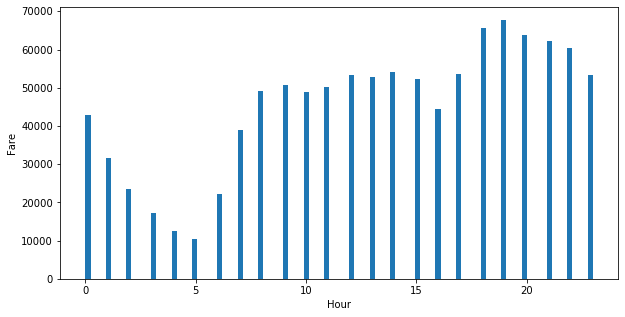

In [80]:
#booking between peak time
plt.figure(figsize = (10,5))
plt.hist(df['hour'], bins= 100)
plt.xlabel('Hour')
plt.ylabel('Fare')

Text(0, 0.5, 'Fare Amount')

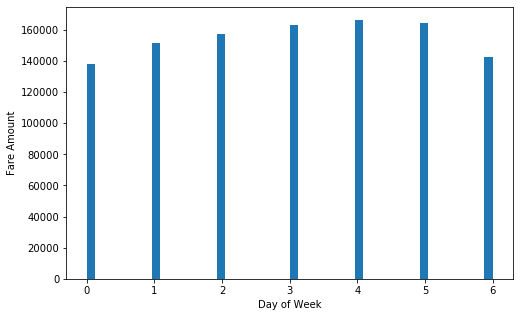

In [81]:
#Does the day of the week affect the fare?
plt.figure(figsize = (8,5))
plt.hist(df['day_of_month'],bins= 50)
plt.xlabel('Day of Week')
plt.ylabel('Fare Amount')

In [82]:
#So we will check if trip was in month of Jan and Feb it is during snow season
df['snow_season']=((df['month']==1) | (df['month']==2)).astype(int)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,day_of_month,hour,minutes,seconds,day,day_type,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1,1.253913,2013,July,...,1,19,54,0,Tuesday,0,531.069206,00:08:51.069206,2013-07-02 20:02:51.069206+00:00,0
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5,1.088365,2012,April,...,3,5,50,0,Thursday,0,460.954470,00:07:40.954470,2012-04-05 05:57:40.954470+00:00,0
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1,2.174232,2015,May,...,6,8,2,59,Sunday,1,920.851304,00:15:20.851304,2015-05-17 08:18:19.851304+00:00,0
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6,1.245295,2014,October,...,4,8,28,0,Friday,0,527.418928,00:08:47.418928,2014-10-17 08:36:47.418928+00:00,0
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1,1.043249,2013,May,...,4,16,39,8,Friday,0,441.846741,00:07:21.846741,2013-05-10 16:46:29.846741+00:00,0


In [83]:
#Adding additional coulmns.
df['night_trip']=((df['hour']>23) | (df['hour']<6)).astype(int)

df['morning_trip']=((df['hour']>=6) & (df['hour']<=12)).astype(int)

df['aftrnoon_trip']=((df['hour']>12) & (df['hour']<=17)).astype(int)

df['evening_trip']=((df['hour']>17) & (df['hour']<=23)).astype(int)

In [84]:
df[['hour','night_trip','morning_trip','aftrnoon_trip','evening_trip']].head(10)

,hour,night_trip,morning_trip,aftrnoon_trip,evening_trip
0,19,0,0,0,1
1,5,1,0,0,0
2,8,0,1,0,0
3,8,0,1,0,0
4,16,0,0,1,0
5,23,0,0,0,1
6,21,0,0,0,1
7,20,0,0,0,1
8,7,0,1,0,0
9,14,0,0,1,0


In [85]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,day,day_type,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1,1.253913,2013,July,...,Tuesday,0,531.069206,00:08:51.069206,2013-07-02 20:02:51.069206+00:00,0,0,0,0,1
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5,1.088365,2012,April,...,Thursday,0,460.954470,00:07:40.954470,2012-04-05 05:57:40.954470+00:00,0,1,0,0,0
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1,2.174232,2015,May,...,Sunday,1,920.851304,00:15:20.851304,2015-05-17 08:18:19.851304+00:00,0,0,1,0,0
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6,1.245295,2014,October,...,Friday,0,527.418928,00:08:47.418928,2014-10-17 08:36:47.418928+00:00,0,0,1,0,0
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1,1.043249,2013,May,...,Friday,0,441.846741,00:07:21.846741,2013-05-10 16:46:29.846741+00:00,0,0,0,1,0


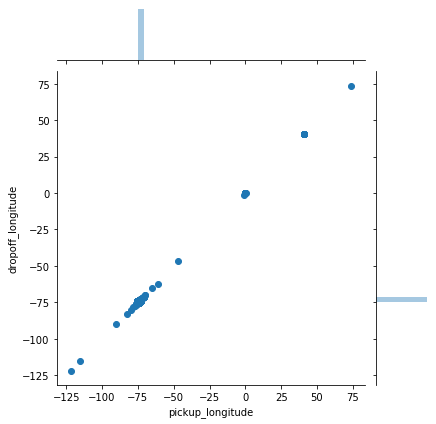

In [86]:
sns.jointplot(x='pickup_longitude',y='dropoff_longitude',data=df)

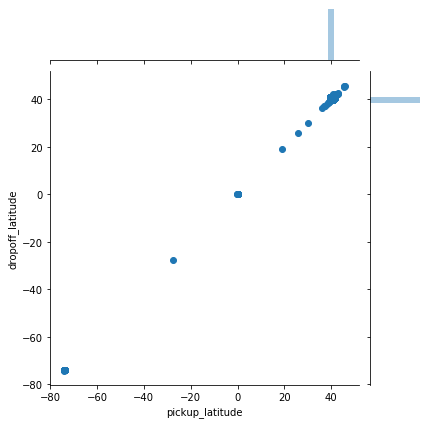

In [87]:
sns.jointplot(x='pickup_latitude',y='dropoff_latitude',data=df)

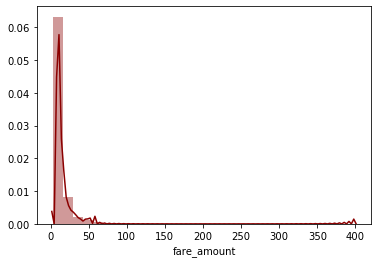

In [88]:
sns.distplot(df['fare_amount'].dropna(),color='darkred',bins=30)

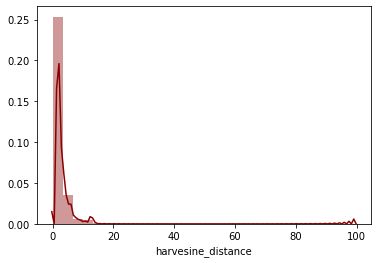

In [89]:
sns.distplot(df['harvesine_distance'].dropna(),color='darkred',bins=30)

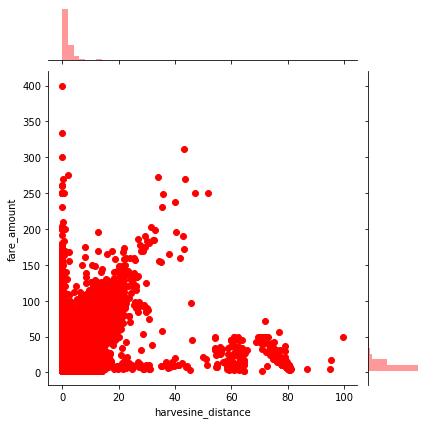

In [90]:
sns.jointplot(x='harvesine_distance',y='fare_amount',data=df,color='red');

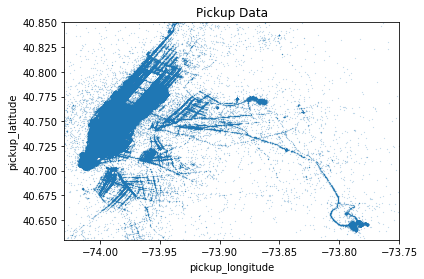

In [91]:
imageSize = (700,700)
longRange = [-74.03, -73.75]
latRange = [40.63, 40.85]

df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
plt.title("Pickup Data")

plt.ylim(latRange)
plt.xlim(longRange)
plt.show()

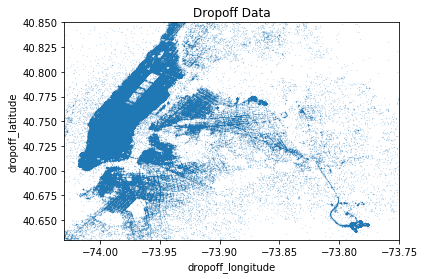

In [92]:
imageSize = (700,700)
longRange = [-74.03, -73.75]
latRange = [40.63, 40.85]

df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)

plt.title("Dropoff Data")

plt.ylim(latRange)
plt.xlim(longRange)
plt.show()

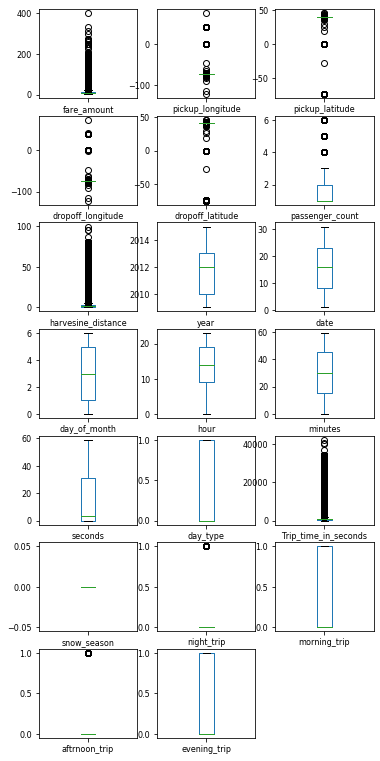

In [93]:
df.plot(kind='box', subplots=True, layout=(8,3), sharex=False, sharey=False, fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top= 3,wspace=0.2, hspace=0.2)
plt.show()

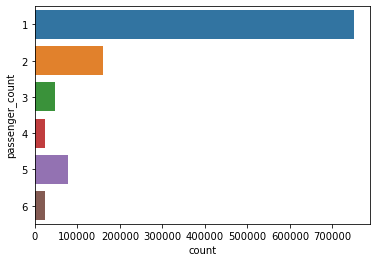

In [94]:
sns.countplot(y='passenger_count',data=df)

In [95]:
##sns.countplot(y='harvesine_distance',data=df)

# Finding does distance effect the fair?

In [96]:
df.sort_values(['harvesine_distance','fare_amount'], ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,day,day_type,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip
999231,49.8,2011-04-21 12:36:32+00:00,-75.329188,40.645350,-73.931414,39.676922,1,99.550980,2011,April,...,Thursday,0,42162.767837,11:42:42.767837,2011-04-22 00:19:14.767837+00:00,0,0,1,0,0
547535,18.0,2013-12-06 22:36:00+00:00,-73.988545,40.758740,-75.094473,41.863238,1,95.420021,2013,December,...,Friday,0,40413.185389,11:13:33.185389,2013-12-07 09:49:33.185389+00:00,0,0,0,0,1
550414,5.0,2013-01-04 09:04:00+00:00,-74.000707,40.725627,-74.007070,42.100000,2,94.894463,2013,January,...,Friday,0,40190.595919,11:09:50.595919,2013-01-04 20:13:50.595919+00:00,0,0,1,0,0
444822,5.0,2014-04-01 17:45:14+00:00,-60.940228,45.549041,-62.731675,45.445040,1,86.995644,2014,April,...,Tuesday,0,36845.213767,10:14:05.213767,2014-04-02 03:59:19.213767+00:00,0,0,0,1,0
1072061,4.9,2011-02-22 08:52:57+00:00,-73.959224,39.604505,-73.959106,40.777555,3,80.993477,2011,February,...,Tuesday,0,34303.119615,09:31:43.119615,2011-02-22 18:24:40.119615+00:00,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104134,2.5,2009-04-25 04:27:43+00:00,-73.984377,40.760604,-73.984377,40.760604,1,0.000000,2009,April,...,Saturday,1,0.000000,00:00:00,2009-04-25 04:27:43+00:00,0,1,0,0,0
1106138,2.5,2011-11-06 11:57:24+00:00,-73.947126,40.744972,-73.947126,40.744972,1,0.000000,2011,November,...,Sunday,1,0.000000,00:00:00,2011-11-06 11:57:24+00:00,0,0,1,0,0
1106303,2.5,2013-06-17 15:23:21+00:00,-73.863176,40.769353,-73.863176,40.769353,1,0.000000,2013,June,...,Monday,0,0.000000,00:00:00,2013-06-17 15:23:21+00:00,0,0,0,1,0
1107149,2.5,2013-09-12 16:04:31+00:00,-73.997638,40.726035,-73.997638,40.726035,1,0.000000,2013,September,...,Thursday,0,0.000000,00:00:00,2013-09-12 16:04:31+00:00,0,0,0,1,0


Text(0, 0.5, 'Frequency')

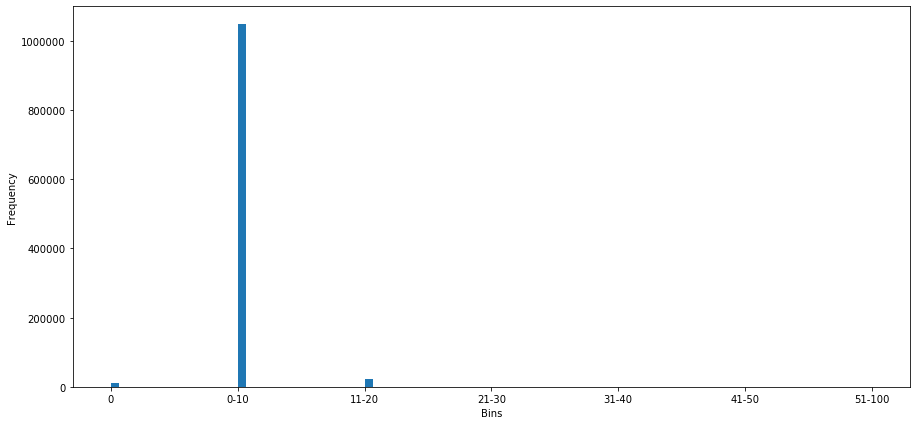

In [97]:
range_0 = df.loc[(df['harvesine_distance'] == 0), ['harvesine_distance']]
range_1 = df.loc[(df['harvesine_distance'] > 0) & (df['harvesine_distance'] <= 10),['harvesine_distance']]
range_2 = df.loc[(df['harvesine_distance'] > 10) & (df['harvesine_distance'] <= 20),['harvesine_distance']]
range_3 = df.loc[(df['harvesine_distance'] > 20) & (df['harvesine_distance'] <= 30),['harvesine_distance']]
range_4 = df.loc[(df['harvesine_distance'] > 30) & (df['harvesine_distance'] <= 40),['harvesine_distance']]
range_5 = df.loc[(df['harvesine_distance'] > 40) & (df['harvesine_distance'] <= 50),['harvesine_distance']]
range_6 = df.loc[(df['harvesine_distance'] > 50) & (df['harvesine_distance'] <= 100),['harvesine_distance']]
range_7 = df.loc[(df['harvesine_distance'] > 100) & (df['harvesine_distance'] <= 200),['harvesine_distance']]
range_8 = df.loc[(df['harvesine_distance'] > 200) & (df['harvesine_distance'] <= 300),['harvesine_distance']]
range_9 = df.loc[(df['harvesine_distance'] > 300),['harvesine_distance']]

range_0['bins'] = '0'
range_1['bins'] = '0-10'
range_2['bins'] = '11-20'
range_3['bins'] = '21-30'
range_4['bins'] = '31-40'
range_5['bins'] = '41-50'
range_6['bins'] = '51-100'
range_7['bins'] = '100-200'
range_8['bins'] = '201-300'
range_9['bins'] = '>300'
dist_bins =pd.concat([range_0,range_1,range_2,range_3,range_4,range_5,range_6,range_7,range_8,range_9])
#len(dist_bins)
dist_bins.columns

plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=90)
plt.xlabel('Bins')
plt.ylabel('Frequency')

In [98]:
Counter(dist_bins['bins'])

Counter({'0': 11509,
         '0-10': 1047728,
         '11-20': 22695,
         '21-30': 151,
         '31-40': 28,
         '41-50': 17,
         '51-100': 347})

## Finding is there an relation b/w no:of passengers and fair ?

Text(0, 0.5, 'Frequency')

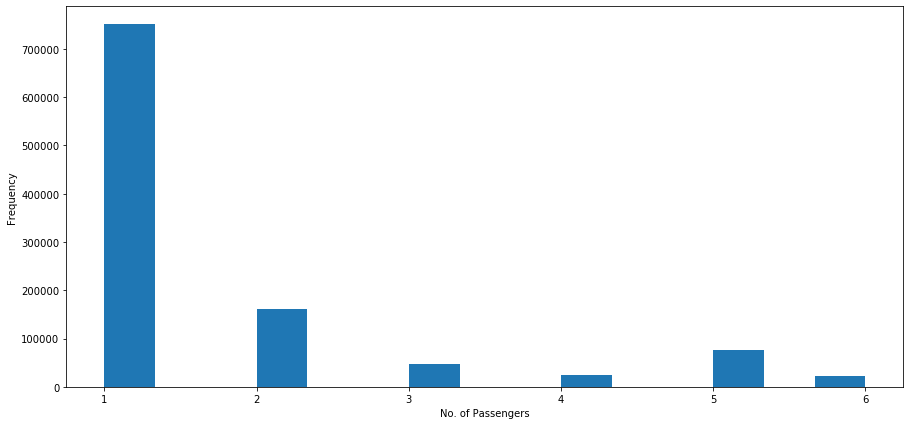

In [99]:
plt.figure(figsize=(15,7))
plt.hist(df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

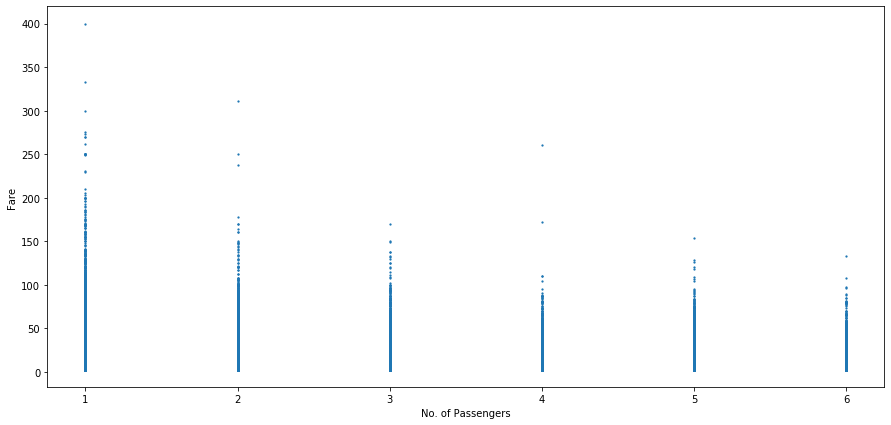

In [100]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['passenger_count'], y=df['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

## Finding weather day of the week effect the fair?

Text(0, 0.5, 'Frequency')

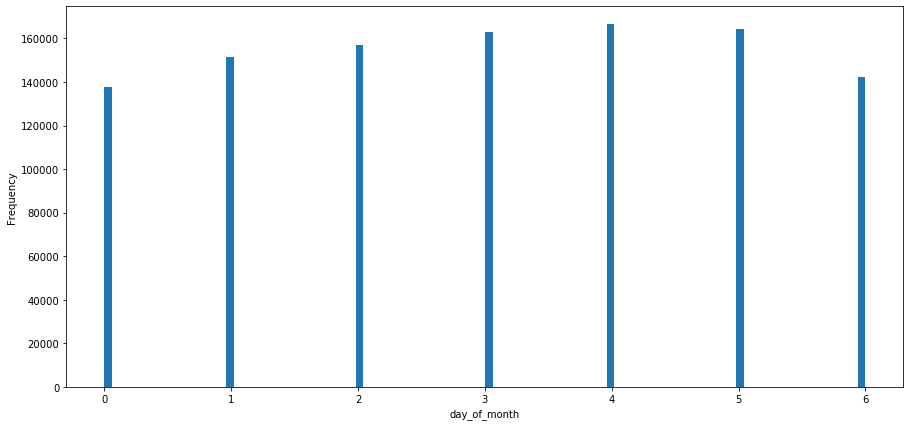

In [101]:
plt.figure(figsize=(15,7))
plt.hist(df['day_of_month'], bins=100)
plt.xlabel('day_of_month')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

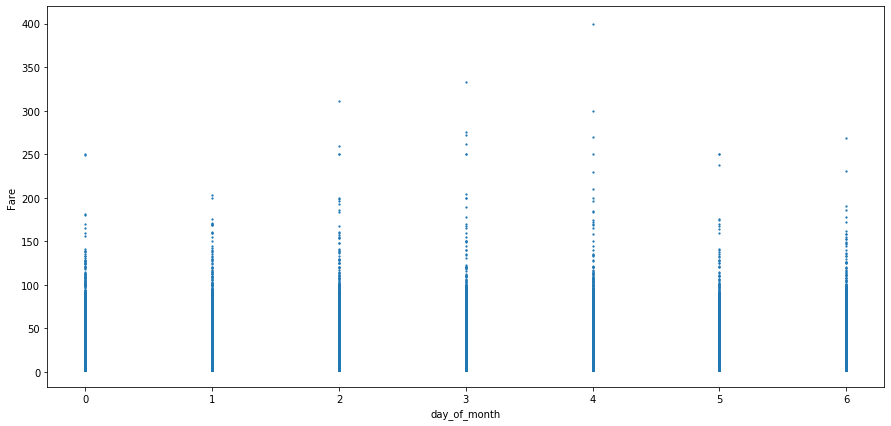

In [102]:
plt.figure(figsize=(15,7))
plt.scatter(x=df['day_of_month'], y=df['fare_amount'], s=1.5)
plt.xlabel('day_of_month')
plt.ylabel('Fare')

In [103]:
df['est_tripduration_hrs'] = df.harvesine_distance/8.5

In [104]:
df['est_tripduration_mins'] = df.est_tripduration_hrs*60

In [105]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1,1.253913,2013,July,...,531.069206,00:08:51.069206,2013-07-02 20:02:51.069206+00:00,0,0,0,0,1,0.147519,8.851153
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5,1.088365,2012,April,...,460.954470,00:07:40.954470,2012-04-05 05:57:40.954470+00:00,0,1,0,0,0,0.128043,7.682574
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1,2.174232,2015,May,...,920.851304,00:15:20.851304,2015-05-17 08:18:19.851304+00:00,0,0,1,0,0,0.255792,15.347522
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6,1.245295,2014,October,...,527.418928,00:08:47.418928,2014-10-17 08:36:47.418928+00:00,0,0,1,0,0,0.146505,8.790315
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1,1.043249,2013,May,...,441.846741,00:07:21.846741,2013-05-10 16:46:29.846741+00:00,0,0,0,1,0,0.122735,7.364112


# when fare and distance are 0 drop those records

In [106]:
df[(df['harvesine_distance']==0)&(df['fare_amount']==0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins


In [107]:
df = df.drop(df[(df['harvesine_distance']==0)&(df['fare_amount']==0)].index, axis = 0)

In [108]:
print(df)

         fare_amount           pickup_datetime  pickup_longitude  \
0                7.0 2013-07-02 19:54:00+00:00        -74.005360   
1                6.9 2012-04-05 05:50:00+00:00        -74.007443   
2               14.0 2015-05-17 08:02:59+00:00        -73.979210   
3               10.0 2014-10-17 08:28:00+00:00        -73.991797   
4                5.0 2013-05-10 16:39:08+00:00        -73.971696   
...              ...                       ...               ...   
1108712          4.1 2010-05-19 13:16:10+00:00        -73.970467   
1108714          8.5 2009-09-11 23:37:00+00:00        -73.978357   
1108715         13.3 2011-01-08 11:25:06+00:00        -73.950348   
1108716         18.5 2013-06-26 11:33:55+00:00        -73.974344   
1108717          5.0 2015-05-17 00:27:40+00:00        -73.974289   

         pickup_latitude  dropoff_longitude  dropoff_latitude  \
0              40.728867         -74.008913         40.710907   
1              40.732547         -73.991112         4

In [109]:
df[(df['harvesine_distance']==0)].shape

(11509, 27)

In [110]:
df.shape

(1082475, 27)

# when fair is zero but distance is not 0

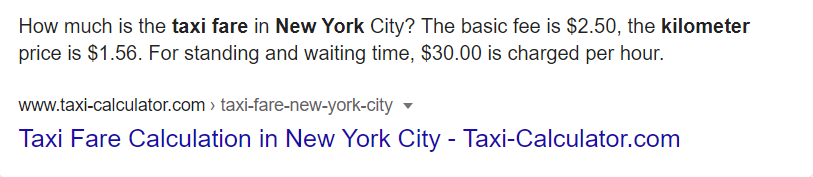

In [111]:
df.loc[(df['harvesine_distance']!=0) & (df['fare_amount']==0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins


In [112]:
data_new_fare = df.loc[(df['harvesine_distance']!=0) & (df['fare_amount']==0)]

In [113]:
data_new_fare.sort_values('harvesine_distance', ascending=False)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins


In [114]:
data_new_fare['fare_amount'] = data_new_fare.apply(lambda row: ((row['harvesine_distance'] * 1.56) + 2.50), axis=1)

In [115]:
data_new_fare['fare_amount']

Series([], Name: fare_amount, dtype: object)

In [116]:
df.update(data_new_fare)

In [117]:
df.shape

(1082475, 27)

In [118]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1,1.253913,2013,July,...,531.069206,00:08:51.069206,2013-07-02 20:02:51.069206+00:00,0,0,0,0,1,0.147519,8.851153
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5,1.088365,2012,April,...,460.954470,00:07:40.954470,2012-04-05 05:57:40.954470+00:00,0,1,0,0,0,0.128043,7.682574
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1,2.174232,2015,May,...,920.851304,00:15:20.851304,2015-05-17 08:18:19.851304+00:00,0,0,1,0,0,0.255792,15.347522
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6,1.245295,2014,October,...,527.418928,00:08:47.418928,2014-10-17 08:36:47.418928+00:00,0,0,1,0,0,0.146505,8.790315
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1,1.043249,2013,May,...,441.846741,00:07:21.846741,2013-05-10 16:46:29.846741+00:00,0,0,0,1,0,0.122735,7.364112


## When Fare is not 0, but Distance is 0. These values can be scalable

In [119]:
df.loc[(df['harvesine_distance']==0) &(df['pickup_longitude']!=0) & (df['fare_amount']!=0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
100,9.3,2012-07-24 08:55:00+00:00,-73.937452,40.758122,-73.937452,40.758122,1,0.0,2012,July,...,0.0,0 days,2012-07-24 08:55:00+00:00,0,0,1,0,0,0.0,0.0
105,4.1,2011-03-16 18:24:00+00:00,-73.944410,40.751880,-73.944410,40.751880,1,0.0,2011,March,...,0.0,0 days,2011-03-16 18:24:00+00:00,0,0,0,0,1,0.0,0.0
191,14.9,2010-02-12 08:25:00+00:00,-73.958935,40.816683,-73.958935,40.816683,2,0.0,2010,February,...,0.0,0 days,2010-02-12 08:25:00+00:00,0,0,1,0,0,0.0,0.0
348,6.5,2012-03-27 19:17:00+00:00,-73.997208,40.736922,-73.997208,40.736922,1,0.0,2012,March,...,0.0,0 days,2012-03-27 19:17:00+00:00,0,0,0,0,1,0.0,0.0
563,2.5,2010-01-28 11:07:38+00:00,-73.997313,40.725548,-73.997313,40.725548,1,0.0,2010,January,...,0.0,0 days,2010-01-28 11:07:38+00:00,0,0,1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108267,5.3,2009-12-05 15:14:18+00:00,-73.995955,40.724995,-73.995955,40.724995,2,0.0,2009,December,...,0.0,0 days,2009-12-05 15:14:18+00:00,0,0,0,1,0,0.0,0.0
1108433,9.5,2013-03-25 10:19:03+00:00,-73.956816,40.790145,-73.956816,40.790145,1,0.0,2013,March,...,0.0,0 days,2013-03-25 10:19:03+00:00,0,0,1,0,0,0.0,0.0
1108478,5.0,2014-06-21 00:51:00+00:00,-73.998082,40.732015,-73.998082,40.732015,1,0.0,2014,June,...,0.0,0 days,2014-06-21 00:51:00+00:00,0,1,0,0,0,0.0,0.0
1108638,4.5,2011-07-22 03:35:00+00:00,-73.993657,40.746833,-73.993657,40.746833,3,0.0,2011,July,...,0.0,0 days,2011-07-22 03:35:00+00:00,0,1,0,0,0,0.0,0.0


In [120]:
Fare_not_0 = df.loc[(df['harvesine_distance']==0) &(df['pickup_longitude']!=0) & (df['fare_amount']!=0)]

In [121]:
Fare_not_0.loc[(Fare_not_0['fare_amount']>2.5) &(df['pickup_longitude']!=0) &(Fare_not_0['harvesine_distance']==0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
100,9.3,2012-07-24 08:55:00+00:00,-73.937452,40.758122,-73.937452,40.758122,1,0.0,2012,July,...,0.0,0 days,2012-07-24 08:55:00+00:00,0,0,1,0,0,0.0,0.0
105,4.1,2011-03-16 18:24:00+00:00,-73.944410,40.751880,-73.944410,40.751880,1,0.0,2011,March,...,0.0,0 days,2011-03-16 18:24:00+00:00,0,0,0,0,1,0.0,0.0
191,14.9,2010-02-12 08:25:00+00:00,-73.958935,40.816683,-73.958935,40.816683,2,0.0,2010,February,...,0.0,0 days,2010-02-12 08:25:00+00:00,0,0,1,0,0,0.0,0.0
348,6.5,2012-03-27 19:17:00+00:00,-73.997208,40.736922,-73.997208,40.736922,1,0.0,2012,March,...,0.0,0 days,2012-03-27 19:17:00+00:00,0,0,0,0,1,0.0,0.0
644,49.8,2011-03-25 15:10:06+00:00,-73.982689,40.743866,-73.982689,40.743866,1,0.0,2011,March,...,0.0,0 days,2011-03-25 15:10:06+00:00,0,0,0,1,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108267,5.3,2009-12-05 15:14:18+00:00,-73.995955,40.724995,-73.995955,40.724995,2,0.0,2009,December,...,0.0,0 days,2009-12-05 15:14:18+00:00,0,0,0,1,0,0.0,0.0
1108433,9.5,2013-03-25 10:19:03+00:00,-73.956816,40.790145,-73.956816,40.790145,1,0.0,2013,March,...,0.0,0 days,2013-03-25 10:19:03+00:00,0,0,1,0,0,0.0,0.0
1108478,5.0,2014-06-21 00:51:00+00:00,-73.998082,40.732015,-73.998082,40.732015,1,0.0,2014,June,...,0.0,0 days,2014-06-21 00:51:00+00:00,0,1,0,0,0,0.0,0.0
1108638,4.5,2011-07-22 03:35:00+00:00,-73.993657,40.746833,-73.993657,40.746833,3,0.0,2011,July,...,0.0,0 days,2011-07-22 03:35:00+00:00,0,1,0,0,0,0.0,0.0


In [122]:
Fare_not_0['harvesine_distance'] = Fare_not_0.apply(lambda row: ((row['fare_amount']-2.50)/1.56), axis=1)

C:\Users\Computer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [123]:
df.update(Fare_not_0)

In [124]:
df.shape

(1082475, 27)

In [125]:
df.head(552)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
0,7.0,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1.0,1.253913,2013.0,July,...,531.069206,00:08:51.069206,2013-07-02 20:02:51.069206+00:00,0.0,0.0,0.0,0.0,1.0,0.147519,8.851153
1,6.9,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5.0,1.088365,2012.0,April,...,460.954470,00:07:40.954470,2012-04-05 05:57:40.954470+00:00,0.0,1.0,0.0,0.0,0.0,0.128043,7.682574
2,14.0,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1.0,2.174232,2015.0,May,...,920.851304,00:15:20.851304,2015-05-17 08:18:19.851304+00:00,0.0,0.0,1.0,0.0,0.0,0.255792,15.347522
3,10.0,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6.0,1.245295,2014.0,October,...,527.418928,00:08:47.418928,2014-10-17 08:36:47.418928+00:00,0.0,0.0,1.0,0.0,0.0,0.146505,8.790315
4,5.0,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1.0,1.043249,2013.0,May,...,441.846741,00:07:21.846741,2013-05-10 16:46:29.846741+00:00,0.0,0.0,0.0,1.0,0.0,0.122735,7.364112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,2.5,2010-01-28 11:07:38+00:00,-73.997313,40.725548,-73.997313,40.725548,1.0,0.000000,2010.0,January,...,0.000000,00:00:00,2010-01-28 11:07:38+00:00,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000
564,16.0,2014-04-21 09:51:00+00:00,-74.014352,40.717160,-73.991027,40.750445,1.0,2.602079,2014.0,April,...,1102.057154,00:18:22.057154,2014-04-21 10:09:22.057154+00:00,0.0,0.0,1.0,0.0,0.0,0.306127,18.367619
565,9.0,2015-02-19 19:30:39+00:00,-74.003609,40.725964,-74.002388,40.744473,1.0,1.279547,2015.0,February,...,541.925677,00:09:01.925677,2015-02-19 19:39:40.925677+00:00,0.0,0.0,0.0,0.0,1.0,0.150535,9.032095
566,31.7,2012-04-15 10:26:59+00:00,-73.981032,40.763275,-73.861643,40.768311,1.0,6.252982,2012.0,April,...,2648.321645,00:44:08.321645,2012-04-15 11:11:07.321645+00:00,0.0,0.0,1.0,0.0,0.0,0.735645,44.138694


In [126]:
df.loc[(df['harvesine_distance']==0) &(df['pickup_longitude']==0) & (df['fare_amount']!=0)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins


In [127]:
df = df.drop(df[(df['harvesine_distance']==0)&(df['pickup_longitude']==0)&(df['fare_amount']!=0)].index, axis = 0)

In [128]:
df.shape

(1082475, 27)

In [129]:
df.head(25)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,...,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
0,7.00,2013-07-02 19:54:00+00:00,-74.005360,40.728867,-74.008913,40.710907,1.0,1.253913,2013.0,July,...,531.069206,00:08:51.069206,2013-07-02 20:02:51.069206+00:00,0.0,0.0,0.0,0.0,1.0,0.147519,8.851153
1,6.90,2012-04-05 05:50:00+00:00,-74.007443,40.732547,-73.991112,40.742312,5.0,1.088365,2012.0,April,...,460.954470,00:07:40.954470,2012-04-05 05:57:40.954470+00:00,0.0,1.0,0.0,0.0,0.0,0.128043,7.682574
2,14.00,2015-05-17 08:02:59+00:00,-73.979210,40.723682,-74.017464,40.711395,1.0,2.174232,2015.0,May,...,920.851304,00:15:20.851304,2015-05-17 08:18:19.851304+00:00,0.0,0.0,1.0,0.0,0.0,0.255792,15.347522
3,10.00,2014-10-17 08:28:00+00:00,-73.991797,40.735262,-73.975915,40.748697,6.0,1.245295,2014.0,October,...,527.418928,00:08:47.418928,2014-10-17 08:36:47.418928+00:00,0.0,0.0,1.0,0.0,0.0,0.146505,8.790315
4,5.00,2013-05-10 16:39:08+00:00,-73.971696,40.763378,-73.962035,40.776598,1.0,1.043249,2013.0,May,...,441.846741,00:07:21.846741,2013-05-10 16:46:29.846741+00:00,0.0,0.0,0.0,1.0,0.0,0.122735,7.364112
5,16.50,2014-09-12 23:10:00+00:00,-73.983837,40.676052,-74.002522,40.723145,1.0,3.395468,2014.0,September,...,1438.080462,00:23:58.080462,2014-09-12 23:33:58.080462+00:00,0.0,0.0,0.0,0.0,1.0,0.399467,23.968008
6,4.50,2009-01-16 21:10:00+00:00,-73.994143,40.751193,-73.988897,40.759742,1.0,0.650921,2009.0,January,...,275.684158,00:04:35.684158,2009-01-16 21:14:35.684158+00:00,0.0,0.0,0.0,0.0,1.0,0.076579,4.594736
7,11.70,2011-02-26 20:27:36+00:00,-73.981496,40.781004,-73.995920,40.738813,1.0,3.009173,2011.0,February,...,1274.473437,00:21:14.473437,2011-02-26 20:48:50.473437+00:00,0.0,0.0,0.0,0.0,1.0,0.354020,21.241224
8,27.00,2013-05-02 07:41:00+00:00,-73.987285,40.718622,-73.959295,40.778482,1.0,4.384703,2013.0,May,...,1857.050548,00:30:57.050548,2013-05-02 08:11:57.050548+00:00,0.0,0.0,1.0,0.0,0.0,0.515847,30.950842
9,16.50,2015-04-30 14:07:57+00:00,-74.003990,40.747978,-73.983192,40.756329,1.0,1.231161,2015.0,April,...,521.432843,00:08:41.432843,2015-04-30 14:16:38.432843+00:00,0.0,0.0,0.0,1.0,0.0,0.144842,8.690547


In [130]:
 #For top 1% records
df1 = df.sort_values("harvesine_distance", axis = 0, ascending = True)
ncount= df1['harvesine_distance'].count()
rowCount=(ncount*1)/100
df1=df1.drop(df1.head(int(rowCount)).index, axis = 0)

In [131]:
 df1=df1.sort_values("harvesine_distance", axis = 0, ascending = False)
df1=df1.drop(df1.head(int(rowCount)).index, axis = 0)

In [132]:
df1.shape

(1060827, 27)

In [133]:
p_1 = df.harvesine_distance.quantile(0.01)
print("1 % DISTANCE:",p_1)

1 % DISTANCE: 0.13373084753751754


In [134]:
p_99 = df.harvesine_distance.quantile(0.99)
print("99 % DISTANCE:",p_99)

99 % DISTANCE: 12.756175479888917


In [135]:
len(df[df['harvesine_distance']<=0.13373084753751754])

10825

In [136]:
df=df.drop(df[df['harvesine_distance']<=0.13373084753751754].index,axis=0)

In [137]:
len(df[df['harvesine_distance']>=12.756175479888917])

10825

In [138]:
df=df.drop(df[df['harvesine_distance']>=12.756175479888917].index,axis=0)

In [139]:
df.shape

(1060825, 27)

In [140]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,date,day_of_month,...,day_type,Trip_time_in_seconds,Trip_duration,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip,est_tripduration_hrs,est_tripduration_mins
count,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,...,1.060825e+06,1.060825e+06,1060825,1060825.0,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06,1.060825e+06
mean,1.092211e+01,-7.391397e+01,4.069126e+01,-7.391274e+01,4.069143e+01,1.692756e+00,2.010478e+00,2.011744e+03,1.571923e+01,3.044678e+00,...,2.831919e-01,8.386905e+02,0 days 00:13:58.690451,0.0,1.276704e-01,2.896736e-01,2.368572e-01,3.457988e-01,2.329696e-01,1.397817e+01
std,8.446225e+00,2.640098e+00,2.588216e+00,2.640115e+00,2.588208e+00,1.307980e+00,1.955913e+00,1.863465e+00,8.682512e+00,1.946858e+00,...,4.505490e-01,8.249556e+02,0 days 00:13:44.955630,0.0,3.337227e-01,4.536111e-01,4.251541e-01,4.756282e-01,2.291543e-01,1.374926e+01
min,2.500000e+00,-1.151663e+02,-7.401669e+01,-1.151670e+02,-7.401637e+01,1.000000e+00,1.337425e-01,2.009000e+03,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0 days 00:00:00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399233e+01,4.073679e+01,-7.399159e+01,4.073581e+01,1.000000e+00,8.054365e-01,2.010000e+03,8.000000e+00,1.000000e+00,...,0.000000e+00,3.343298e+02,0 days 00:05:34.329818,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.286939e-02,5.572164e+00
50%,8.500000e+00,-7.398216e+01,4.075349e+01,-7.398065e+01,4.075390e+01,1.000000e+00,1.361529e+00,2.012000e+03,1.600000e+01,3.000000e+00,...,0.000000e+00,5.683371e+02,0 days 00:09:28.337143,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.578714e-01,9.472286e+00
75%,1.250000e+01,-7.396866e+01,4.076764e+01,-7.396569e+01,4.076841e+01,2.000000e+00,2.439137e+00,2.013000e+03,2.300000e+01,5.000000e+00,...,1.000000e+00,1.018317e+03,0 days 00:16:58.316998,0.0,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,2.828658e-01,1.697195e+01
max,2.750000e+02,7.386326e+01,4.576646e+01,7.386326e+01,4.576646e+01,6.000000e+00,1.275616e+01,2.015000e+03,3.100000e+01,6.000000e+00,...,1.000000e+00,5.402608e+03,0 days 01:30:02.608041,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500724e+00,9.004347e+01


In [141]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'harvesine_distance', 'year', 'month', 'date', 'day_of_month', 'hour',
       'minutes', 'seconds', 'day', 'day_type', 'Trip_time_in_seconds',
       'Trip_duration', 'estimate_drop_off_time', 'snow_season', 'night_trip',
       'morning_trip', 'aftrnoon_trip', 'evening_trip', 'est_tripduration_hrs',
       'est_tripduration_mins'],
      dtype='object')

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X = df[['passenger_count','harvesine_distance', 'year', 'date', 'day_of_month', 'snow_season', 'night_trip','morning_trip', 'aftrnoon_trip', 'evening_trip',]]

Y = df['fare_amount']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [145]:
from sklearn.metrics import mean_squared_error

In [146]:
avg = round(np.mean(y_train),2)
print("average_fair",avg)

average_fair 10.92


In [147]:
baseline = np.repeat(avg,y_test.shape[0]) 
print("baseline_prediction:",baseline)

baseline_prediction: [10.92 10.92 10.92 ... 10.92 10.92 10.92]


In [148]:
baseline_rmse = np.sqrt(mean_squared_error(baseline,y_test))
print("baseline rmse of validation data:",baseline_rmse)

baseline rmse of validation data: 8.429578147245547


# Building a linear Regression model

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
linreg = LinearRegression()

In [151]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
y_pred_lreg = linreg.predict(X_test)

In [153]:
linreg_rmse =np.sqrt(mean_squared_error(y_pred_lreg,y_test))

In [154]:
linreg_rmse

3.9264111327936426

In [155]:
linreg_train_rmse =np.sqrt(mean_squared_error(linreg.predict(X_train),y_train))

In [156]:
linreg_train_rmse

3.9786210740926053

In [157]:
linreg_variance = abs(linreg_train_rmse-linreg_rmse)

In [158]:
linreg_variance

0.052209941298962725

In [159]:
linreg.score(X_test,y_test)

0.7830398612354104

In [160]:
from sklearn.metrics import r2_score
r2 = r2_score(y_pred_lreg,y_test)

In [161]:
print('the required value is:' +str(r2))

the required value is:0.7237199239659409


In [162]:
import random

In [163]:
path = "G:/REG data set/new_dataset_5M_new.csv"
n = sum(1 for line in open(path))
s = 25000
skip = sorted(random.sample(range(1,n+1),n-s))
df_new = pd.read_csv(path, skiprows=skip)

In [164]:
df_new.shape

(25000, 9)

In [165]:
df_new.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [166]:
df_new = df_new.drop(df_new[df_new.isnull().any(1)].index, axis = 0)

In [167]:
from collections import Counter
Counter(df_new['fare_amount']<0)

Counter({False: 24997, True: 3})

In [168]:
df_new = df_new.drop(df_new[df_new['fare_amount']<0].index, axis=0)
df_new.shape

(24997, 9)

In [169]:
df_new['fare_amount'].sort_values(ascending=False)

13204    180.00
625      174.75
12077    148.33
16548    145.00
5384     130.00
          ...  
15251      2.50
13617      2.50
19274      2.50
9368       2.50
20556      0.01
Name: fare_amount, Length: 24997, dtype: float64

In [170]:
df_new= df_new.drop(df_new[df_new['fare_amount'] < 2.5].index, axis = 0)

In [171]:
df_new.shape

(24996, 9)

In [172]:
df_new['passenger_count'].describe()

count    24996.000000
mean         1.684830
std          1.303374
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [173]:
df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')

In [174]:
df_new.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,283,2013-11-02 20:24:04.0000005,5.5,2013-11-02 20:24:04+00:00,-73.990087,40.746717,-73.991496,40.735604,1
1,408,2012-02-15 11:19:50.0000002,4.1,2012-02-15 11:19:50+00:00,-73.982112,40.721073,-73.992240,40.725313,0
2,627,2013-07-01 23:13:55.0000004,7.5,2013-07-01 23:13:55+00:00,-73.978851,40.762699,-73.988206,40.761571,1
3,901,2010-09-25 18:12:40.0000002,4.5,2010-09-25 18:12:40+00:00,-73.977919,40.754634,-73.969430,40.766469,1
4,922,2012-10-16 19:48:00.00000038,17.0,2012-10-16 19:48:00+00:00,-73.864802,40.771122,-73.848398,40.724138,1


In [175]:
df_new[df_new['passenger_count']>6]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [176]:
len(df_new[df_new['passenger_count'] <= 0])

82

In [177]:
df_new=df_new.drop(df_new[df_new['passenger_count'] <= 0].index, axis = 0)

In [178]:
df_new.shape

(24914, 9)

In [179]:
df_new[df_new['pickup_latitude']<-90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [180]:
df_new[df_new['pickup_latitude']>90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [181]:
df_new = df_new.drop(df_new[df_new['pickup_latitude']>90].index, axis = 0)

In [182]:
df_new.shape

(24914, 9)

In [183]:
df_new[df_new['pickup_latitude']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
10,2665,2010-10-26 09:09:00.000000251,4.10,2010-10-26 09:09:00+00:00,0.0,0.0,0.000000,0.00000,2
116,27531,2011-01-07 21:53:00.00000019,7.70,2011-01-07 21:53:00+00:00,0.0,0.0,0.000000,0.00000,1
194,45251,2009-10-08 19:41:00.00000087,7.30,2009-10-08 19:41:00+00:00,0.0,0.0,0.000000,0.00000,1
233,51948,2011-03-20 10:30:00.00000019,8.90,2011-03-20 10:30:00+00:00,0.0,0.0,0.000000,0.00000,1
235,52601,2011-04-17 00:23:00.000000153,8.90,2011-04-17 00:23:00+00:00,0.0,0.0,0.000000,0.00000,2
...,...,...,...,...,...,...,...,...,...
24629,5462468,2013-03-05 04:41:00.0000004,57.33,2013-03-05 04:41:00+00:00,0.0,0.0,0.000000,0.00000,1
24633,5462977,2012-06-04 01:24:02.0000001,9.70,2012-06-04 01:24:02+00:00,0.0,0.0,0.000000,0.00000,3
24761,5494360,2015-02-09 21:57:40.0000001,8.50,2015-02-09 21:57:40+00:00,0.0,0.0,0.000000,0.00000,2
24931,5533483,2014-07-12 00:52:17.0000002,5.00,2014-07-12 00:52:17+00:00,0.0,0.0,-73.988912,40.75679,1


In [184]:
df_new = df_new.drop(df_new[df_new['pickup_latitude']==0].index, axis = 0)

In [185]:
df_new.shape

(24453, 9)

In [186]:
df_new[df_new['pickup_longitude']<-180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
9517,2101126,2012-04-27 15:08:00.00000024,10.1,2012-04-27 15:08:00+00:00,-736.116667,40.794062,0.000000,0.000000,1
12333,2751436,2012-04-19 09:40:00.00000086,35.3,2012-04-19 09:40:00+00:00,-736.516667,40.758745,-73.872065,40.774465,5
13589,3025512,2012-07-30 21:34:00.000000124,14.1,2012-07-30 21:34:00+00:00,-736.000000,40.758265,-736.000000,40.758265,2


In [187]:
df_new[df_new['pickup_longitude']>180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [188]:
df_new[df_new['pickup_longitude']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19335,4293762,2012-05-23 17:35:00.000000152,10.1,2012-05-23 17:35:00+00:00,0.0,40.736982,-73.975183,40.755847,1
23219,5155893,2012-09-18 21:44:00.00000073,58.0,2012-09-18 21:44:00+00:00,0.0,40.759067,0.000000,40.759067,2


In [189]:
df_new = df_new.drop(df_new[df_new['pickup_longitude']==0].index, axis = 0)

In [190]:
df_new.shape

(24451, 9)

In [191]:
df_new[df_new['dropoff_latitude']<-90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [192]:
df_new[df_new['dropoff_latitude']>90]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [193]:
df_new = df_new.drop(df_new[df_new['dropoff_latitude']>90].index, axis = 0)

In [194]:
df_new[df_new['dropoff_latitude']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
142,33171,2013-07-31 00:05:31.0000003,6.00,2013-07-31 00:05:31+00:00,-73.990825,40.735060,0.0,0.0,1
2138,473430,2014-08-10 17:54:00.000000141,8.50,2014-08-10 17:54:00+00:00,-74.005202,40.740425,0.0,0.0,1
3276,728671,2015-06-19 22:36:34.0000004,52.00,2015-06-19 22:36:34+00:00,-74.002365,40.730164,0.0,0.0,2
6501,1434900,2011-12-08 22:44:00.000000140,40.50,2011-12-08 22:44:00+00:00,-0.116667,40.656092,0.0,0.0,6
8664,1906046,2014-05-05 06:43:00.0000003,15.00,2014-05-05 06:43:00+00:00,-73.982687,40.771882,0.0,0.0,1
9517,2101126,2012-04-27 15:08:00.00000024,10.10,2012-04-27 15:08:00+00:00,-736.116667,40.794062,0.0,0.0,1
9636,2128346,2012-12-12 08:01:00.000000101,35.25,2012-12-12 08:01:00+00:00,-74.062132,40.871780,0.0,0.0,1
11283,2507921,2014-10-20 21:36:59.0000001,3.00,2014-10-20 21:36:59+00:00,-73.981228,40.759129,0.0,0.0,1
12382,2760069,2012-10-08 21:25:00.00000054,52.00,2012-10-08 21:25:00+00:00,-74.038205,40.712685,0.0,0.0,3
13439,2994835,2015-04-01 09:55:02.0000009,13.00,2015-04-01 09:55:02+00:00,-73.977585,40.784294,0.0,0.0,1


In [195]:
df_new = df_new.drop(df_new[df_new['dropoff_latitude']==0].index, axis = 0)

In [196]:
df_new.shape

(24437, 9)

In [197]:
df_new[df_new['dropoff_longitude']<-180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
7109,1564328,2012-04-20 11:19:00.0000005,6.5,2012-04-20 11:19:00+00:00,-73.972227,40.759095,-736.45,40.759095,1
13589,3025512,2012-07-30 21:34:00.000000124,14.1,2012-07-30 21:34:00+00:00,-736.000000,40.758265,-736.00,40.758265,2
14943,3320883,2012-05-18 09:41:00.00000077,6.9,2012-05-18 09:41:00+00:00,-74.004500,40.752287,-740.00,40.752287,1


In [198]:
df_new[df_new['dropoff_longitude']>180]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [199]:
df_new[df_new['dropoff_longitude']==0]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
780,170341,2013-04-29 13:30:00.000000179,6.0,2013-04-29 13:30:00+00:00,-73.988625,40.737882,0.0,40.727818,6
20785,4616927,2012-08-14 13:48:00.000000208,4.1,2012-08-14 13:48:00+00:00,-73.971218,40.763458,0.0,40.763458,1


In [200]:
def harvesine_distance(lon1,lat1,lon2,lat2):
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1,lat1,lon2,lat2])
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c=2*np.arcsin(np.sqrt(a))
    miles=3956*c
    return miles

In [201]:
df_new['harvesine_distance']=harvesine_distance(df_new.pickup_longitude, df_new.pickup_latitude, df_new.dropoff_longitude, df_new.dropoff_latitude).astype(np.float32)

In [202]:
data = [df_new]
for i in data:
    i['year'] = i['pickup_datetime'].dt.year
    i['month'] = i['pickup_datetime'].dt.month
    i['date'] = i['pickup_datetime'].dt.day
    i['day_of_month'] = i['pickup_datetime'].dt.dayofweek
    i['hour'] = i['pickup_datetime'].dt.hour
    i['minutes'] = i['pickup_datetime'].dt.minute
    i['seconds'] = i['pickup_datetime'].dt.second
    i['day'] = i['pickup_datetime'].dt.day_name()  
    i['month'] = i['pickup_datetime'].dt.month_name()

In [203]:
df_new['day_type'] = ((df_new['day_of_month']==5)|(df_new['day_of_month']==6)).astype(int)
df_new[['day_of_month','day_type']].head()

,day_of_month,day_type
0,5,1
2,0,0
3,5,1
4,1,0
5,4,0


In [204]:
df_new.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,year,month,date,day_of_month,hour,minutes,seconds,day,day_type
0,283,2013-11-02 20:24:04.0000005,5.5,2013-11-02 20:24:04+00:00,-73.990087,40.746717,-73.991496,40.735604,1,0.770832,2013,November,2,5,20,24,4,Saturday,1
2,627,2013-07-01 23:13:55.0000004,7.5,2013-07-01 23:13:55+00:00,-73.978851,40.762699,-73.988206,40.761571,1,0.495396,2013,July,1,0,23,13,55,Monday,0
3,901,2010-09-25 18:12:40.0000002,4.5,2010-09-25 18:12:40+00:00,-73.977919,40.754634,-73.969430,40.766469,1,0.929964,2010,September,25,5,18,12,40,Saturday,1
4,922,2012-10-16 19:48:00.00000038,17.0,2012-10-16 19:48:00+00:00,-73.864802,40.771122,-73.848398,40.724138,1,3.355584,2012,October,16,1,19,48,0,Tuesday,0
5,1078,2009-03-06 13:50:27.0000004,6.5,2009-03-06 13:50:27+00:00,-73.991611,40.738339,-73.993544,40.749595,1,0.783724,2009,March,6,4,13,50,27,Friday,0


In [205]:
df_new=df_new.drop(df_new[df_new['harvesine_distance'] > 100].index, axis = 0)

In [206]:
import datetime
from datetime import datetime, timedelta

In [207]:
def Trip_duration_in_seconds(dist, speed): 
    print(" Distance(miles) :", dist); 
    print(" Speed(miles / hr) :", speed); 
    trip_time= dist/speed
    trip_time_in_sec= trip_time*3600
    return trip_time_in_sec; 

In [208]:
df_new['Trip_time_in_seconds']=Trip_duration_in_seconds(df_new.harvesine_distance, 8.5)

 Distance(miles) : 0        0.770832
2        0.495396
3        0.929964
4        3.355584
5        0.783724
           ...   
24995    5.857996
24996    1.297899
24997    0.942682
24998    2.479835
24999    1.113581
Name: harvesine_distance, Length: 24424, dtype: float32
 Speed(miles / hr) : 8.5


In [209]:
df_new.shape

(24424, 20)

In [210]:
df_new['Trip_duration'] = [timedelta(seconds=d) for d in df_new.Trip_time_in_seconds]

In [211]:
df_new['estimate_drop_off_time'] = df_new['pickup_datetime'] + df_new['Trip_duration']

In [212]:
df_new['snow_season']=((df_new['month']==1) | (df_new['month']==2)).astype(int)
df_new.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,harvesine_distance,...,day_of_month,hour,minutes,seconds,day,day_type,Trip_time_in_seconds,Trip_duration,estimate_drop_off_time,snow_season
0,283,2013-11-02 20:24:04.0000005,5.5,2013-11-02 20:24:04+00:00,-73.990087,40.746717,-73.991496,40.735604,1,0.770832,...,5,20,24,4,Saturday,1,326.469949,00:05:26.469949,2013-11-02 20:29:30.469949+00:00,0
2,627,2013-07-01 23:13:55.0000004,7.5,2013-07-01 23:13:55+00:00,-73.978851,40.762699,-73.988206,40.761571,1,0.495396,...,0,23,13,55,Monday,0,209.814797,00:03:29.814797,2013-07-01 23:17:24.814797+00:00,0
3,901,2010-09-25 18:12:40.0000002,4.5,2010-09-25 18:12:40+00:00,-73.977919,40.754634,-73.969430,40.766469,1,0.929964,...,5,18,12,40,Saturday,1,393.866982,00:06:33.866982,2010-09-25 18:19:13.866982+00:00,0
4,922,2012-10-16 19:48:00.00000038,17.0,2012-10-16 19:48:00+00:00,-73.864802,40.771122,-73.848398,40.724138,1,3.355584,...,1,19,48,0,Tuesday,0,1421.188377,00:23:41.188377,2012-10-16 20:11:41.188377+00:00,0
5,1078,2009-03-06 13:50:27.0000004,6.5,2009-03-06 13:50:27+00:00,-73.991611,40.738339,-73.993544,40.749595,1,0.783724,...,4,13,50,27,Friday,0,331.929992,00:05:31.929992,2009-03-06 13:55:58.929992+00:00,0


In [213]:
df_new['night_trip']=((df_new['hour']>23) | (df_new['hour']<6)).astype(int)

df_new['morning_trip']=((df_new['hour']>=6) & (df_new['hour']<=12)).astype(int)

df_new['aftrnoon_trip']=((df_new['hour']>12) & (df_new['hour']<=17)).astype(int)

df_new['evening_trip']=((df_new['hour']>17) & (df_new['hour']<=23)).astype(int)

In [214]:
df_new[['hour','night_trip','morning_trip','aftrnoon_trip','evening_trip']].head(10)

,hour,night_trip,morning_trip,aftrnoon_trip,evening_trip
0,20,0,0,0,1
2,23,0,0,0,1
3,18,0,0,0,1
4,19,0,0,0,1
5,13,0,0,1,0
6,16,0,0,1,0
7,14,0,0,1,0
8,21,0,0,0,1
9,16,0,0,1,0
11,0,1,0,0,0


In [215]:
df_new.shape

(24424, 27)

In [216]:
df_new.drop(['key'], axis=1,inplace= True)

In [217]:
df_new.drop(['Unnamed: 0'], axis=1,inplace= True)

In [218]:
df_new.shape

(24424, 25)

In [219]:
df_new.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'harvesine_distance', 'year', 'month', 'date', 'day_of_month', 'hour',
       'minutes', 'seconds', 'day', 'day_type', 'Trip_time_in_seconds',
       'Trip_duration', 'estimate_drop_off_time', 'snow_season', 'night_trip',
       'morning_trip', 'aftrnoon_trip', 'evening_trip'],
      dtype='object')

In [220]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
a = X_train
b = y_train

In [223]:
a

,passenger_count,harvesine_distance,year,date,day_of_month,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip
307467,2.0,1.226611,2015.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0
300300,1.0,0.523265,2015.0,30.0,5.0,0.0,0.0,0.0,0.0,1.0
1025669,1.0,1.813510,2010.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0
241720,1.0,1.304076,2014.0,11.0,5.0,0.0,0.0,0.0,1.0,0.0
928008,1.0,1.538462,2009.0,11.0,4.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
375919,1.0,2.466689,2012.0,31.0,1.0,0.0,0.0,1.0,0.0,0.0
159149,2.0,0.817066,2015.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0
1006897,3.0,1.139212,2011.0,17.0,3.0,0.0,0.0,0.0,0.0,1.0
123316,1.0,2.048807,2011.0,18.0,4.0,0.0,0.0,1.0,0.0,0.0


In [224]:
b

307467     11.5
300300      5.5
1025669     8.1
241720     10.5
928008      4.9
           ... 
375919      9.7
159149     10.5
1006897     6.1
123316      8.9
319421      6.0
Name: fare_amount, Length: 795618, dtype: float64

In [225]:
a.size

7956180

In [226]:
b.size

795618

In [227]:
df_new.shape

(24424, 25)

In [228]:
x_test = df_new[['passenger_count','harvesine_distance', 'year', 'date', 'day_of_month', 'snow_season', 'night_trip','morning_trip', 'aftrnoon_trip', 'evening_trip']]

In [229]:
x_test

,passenger_count,harvesine_distance,year,date,day_of_month,snow_season,night_trip,morning_trip,aftrnoon_trip,evening_trip
0,1,0.770832,2013,2,5,0,0,0,0,1
2,1,0.495396,2013,1,0,0,0,0,0,1
3,1,0.929964,2010,25,5,0,0,0,0,1
4,1,3.355584,2012,16,1,0,0,0,0,1
5,1,0.783724,2009,6,4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
24995,1,5.857996,2011,28,1,0,0,0,1,0
24996,1,1.297899,2011,20,3,0,0,0,0,1
24997,1,0.942682,2015,22,2,0,0,0,0,1
24998,5,2.479835,2010,13,4,0,0,0,0,1


In [230]:
x_test.shape

(24424, 10)

In [231]:
y_test = df_new['fare_amount']

In [232]:
y_test

0         5.5
2         7.5
3         4.5
4        17.0
5         6.5
         ... 
24995    32.5
24996    10.1
24997    11.0
24998     8.1
24999     7.5
Name: fare_amount, Length: 24424, dtype: float64

In [233]:
y_test.shape

(24424,)

In [234]:
a.shape

(795618, 10)

In [235]:
b.shape

(795618,)

In [236]:
x_test.shape

(24424, 10)

In [237]:
y_test.shape

(24424,)

In [238]:
predictions = linreg.predict( x_test)

Text(0, 0.5, 'Predicted Y')

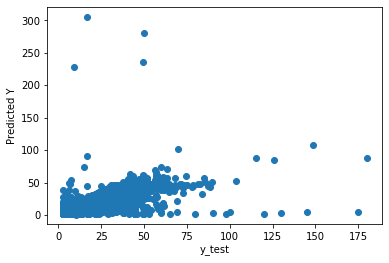

In [239]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')

In [240]:
linreg_rmse = np.sqrt(mean_squared_error(predictions,y_test))

In [241]:
linreg_rmse

5.705867863518155

In [242]:
linreg_train_rmse =np.sqrt(mean_squared_error(linreg.predict(a),b))

In [243]:
linreg_train_rmse

3.9786210740926053

In [244]:
linreg_variance = abs(linreg_train_rmse-linreg_rmse)

In [245]:
linreg_variance

1.7272467894255499

In [246]:
from sklearn.metrics import r2_score
r2 = r2_score(predictions,y_test)

In [247]:
print('the required value is:' +str(r2))

the required value is:0.6116652791870506


# RandomForestRegressor

In [248]:
from sklearn.ensemble import RandomForestRegressor

In [249]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'passenger_count', 'harvesine_distance', 'year', 'date', 'day_of_month', 'hour']]

Y = df['fare_amount']

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [252]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(742577, 10) (318248, 10) (742577,) (318248,)


In [253]:
from sklearn.ensemble import RandomForestRegressor

In [254]:
rf = RandomForestRegressor()

In [255]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [256]:
rf_predict = rf.predict(X_test)
print(rf_predict)

[ 9.43    8.885   5.05   ... 36.5132 11.96    6.83  ]


In [257]:
print(rf_predict)

[ 9.43    8.885   5.05   ... 36.5132 11.96    6.83  ]


In [258]:
rf_rmse = np.sqrt(mean_squared_error(rf_predict,y_test))

In [259]:
rf_rmse

3.1275911647527743

In [260]:
rf_train_rmse =np.sqrt(mean_squared_error(rf.predict(X_train),y_train))

In [261]:
rf_train_rmse

1.1873249637081937

In [262]:
rf_variance = abs(rf_train_rmse-rf_rmse)

In [263]:
rf_variance

1.9402662010445806

In [264]:
rf.score(X_test,y_test)

0.8626529292909808

In [265]:
from sklearn.metrics import r2_score
r2 = r2_score(rf_predict,y_test)

In [266]:
print('the required value is:' +str(r2))

the required value is:0.8414609506538288


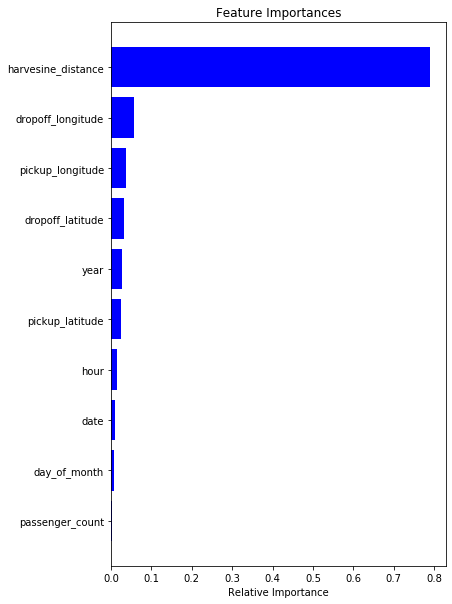

In [267]:
features = X.columns[:X.shape[1]]
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# xgboost

In [268]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import plot_importance

In [269]:

model = XGBRegressor(n_estimators=100,
                    learning_rate = .1,
                    max_depth = 6,
                    random_state=42,
                    n_jobs = -1,
                    early_stopping_rounds=10)

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [271]:
model.fit(X_train, y_train, eval_metric="rmse",verbose=True, )

[11:06:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [272]:
y_train_pred = model.predict(X_train)

In [273]:
print("MSE  for train set : ",mean_squared_error(y_train,y_train_pred))

MSE  for train set :  9.275031661469542


In [274]:
print("RMSE for train set : ",mean_squared_error(y_train,y_train_pred)**0.5)

RMSE for train set :  3.0454936646575943


In [275]:
print("r2_score for train set: ",r2_score(y_train,y_train_pred))

r2_score for train set:  0.8700786698764722


In [276]:
r2_val = r2_score(y_train,y_train_pred)

In [277]:
n = len(X_train)

In [278]:
p = X_train.shape[1]

In [279]:
adjusted_r2_val  = 1 - ( ((1-r2_val)*(n-1)) / (n-p-1) )

In [280]:
print("adjusted r2_score for train set: ",adjusted_r2_val)

adjusted r2_score for train set:  0.8700769202497707


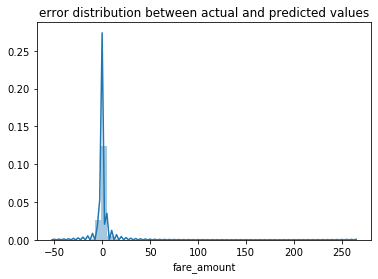

In [281]:
sns.distplot(y_train - y_train_pred ).set_title("error distribution between actual and predicted values")
plt.show()

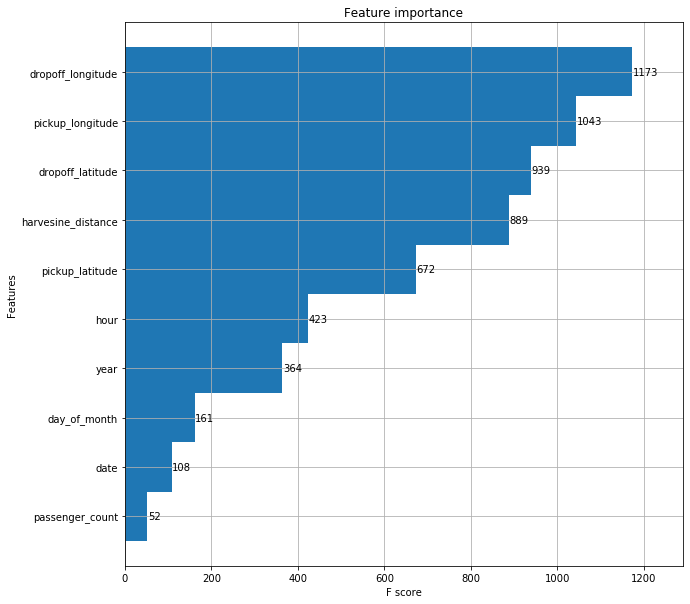

In [282]:
figsize=(10,10)
fig, ax = plt.subplots(1,1,figsize=figsize)
plot_importance(model,ax = ax,height = 1)
plt.show()

# using Important features and train our model once again so that is there any  chance we can

In [283]:
X_train_2 = df[["dropoff_longitude","pickup_longitude","dropoff_latitude","harvesine_distance","pickup_latitude","hour","year"]]
y_train_2 = df["fare_amount"]
X_test_2  = df[["dropoff_longitude","pickup_longitude","dropoff_latitude","harvesine_distance","pickup_latitude","hour","year"]]

In [284]:
model_new = XGBRegressor(n_estimators=100,
                    learning_rate = .1,
                    max_depth = 6,
                    random_state=42,
                    n_jobs = -1,
                    early_stopping_rounds=10)


In [285]:
model_new.fit(X_train_2, y_train_2,eval_metric="rmse",verbose=True, )

[11:08:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=-1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [286]:
y2_train_pred = model_new.predict(X_train_2)

In [287]:
print("MSE  for train set : ",mean_squared_error(y_train_2,y2_train_pred))

MSE  for train set :  9.392737840921907


In [288]:
print("RMSE for train set : ",mean_squared_error(y_train_2,y2_train_pred)**0.5)

RMSE for train set :  3.0647573869593505


In [289]:
print("r2_score for train set: ",r2_score(y_train_2,y2_train_pred))

r2_score for train set:  0.8683359196207817


In [290]:
r2_val = r2_score(y_train_2,y2_train_pred)

In [291]:
n = len(X_train_2)

In [292]:
p = X_train_2.shape[1]

In [293]:
adjusted_r2_val  = 1 - ( ((1-r2_val)*(n-1)) / (n-p-1) )

In [294]:
print("adjusted r2_score for train set: ",adjusted_r2_val)

adjusted r2_score for train set:  0.8683350508106451


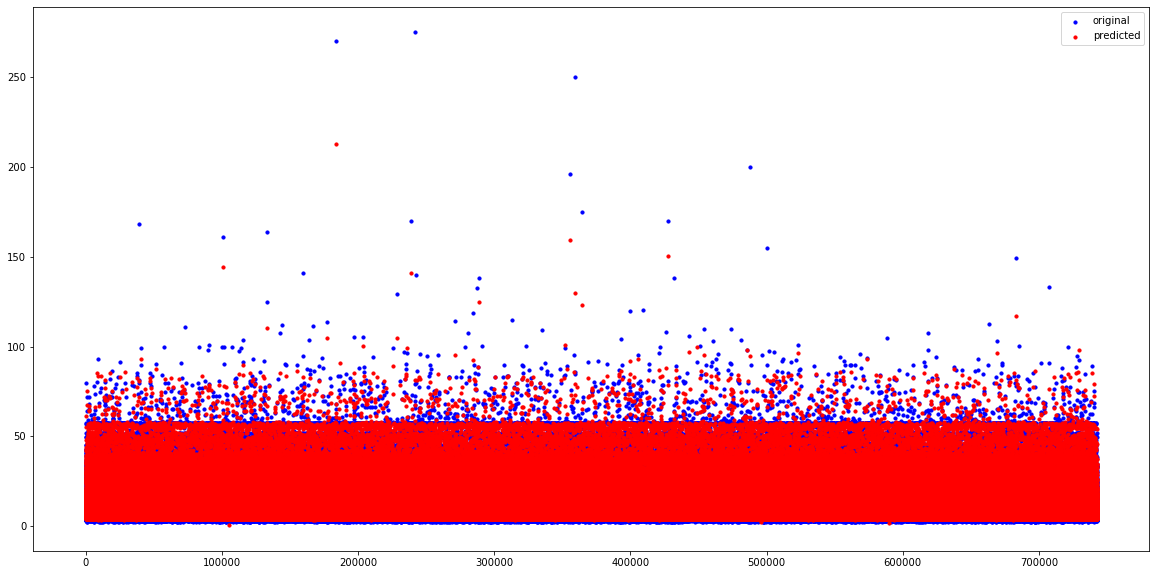

In [295]:
data_distrb = range(len(y_train))
plt.figure(figsize=(20,10))
plt.scatter(data_distrb, y_train, s=10, color="blue", label="original")
plt.scatter(data_distrb, y_train_pred, s=10, color="red", label="predicted")
plt.legend()
plt.show()

# GaussianNB

In [296]:
from sklearn.naive_bayes import GaussianNB

In [297]:
from sklearn import metrics

In [298]:
from sklearn.model_selection import train_test_split

In [299]:
train_df = df.drop(['pickup_datetime', 'month', 'day', 'Trip_duration', 'estimate_drop_off_time'], axis = 1)
test_df = df.drop(['passenger_count','day','month',], axis = 1)

In [300]:
model = GaussianNB()

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# lightgbm

In [302]:
train_df = df.drop(['pickup_datetime', 'month', 'day', 'Trip_duration', 'estimate_drop_off_time'], axis = 1)
test_df = df.drop(['passenger_count','day','month',], axis = 1)

In [303]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('fare_amount', axis=1),
                                                    train_df['fare_amount'], test_size=0.15, random_state = 111)

# Check shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(901701, 21)
(159124, 21)
(901701,)
(159124,)


In [304]:
import lightgbm as lgbm
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': 4,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,
        'num_rounds':50000
    }


In [305]:
def LGBMmodel(X_train,X_test,y_train,y_test,params):
    matrix_train = lgbm.Dataset(X_train, y_train)
    matrix_test = lgbm.Dataset(X_test, y_test)
    model=lgbm.train(params=params,
                    train_set=matrix_train,
                    num_boost_round=100000, 
                    early_stopping_rounds=500,
                    verbose_eval=100,
                    valid_sets=matrix_test)
    return model

In [306]:
model = LGBMmodel(X_train,X_test,y_train,y_test,params)

C:\Users\Computer\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.181282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40208
[LightGBM] [Info] Number of data points in the train set: 901701, number of used features: 20
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 10.920697
Training until validation scores don't improve for 500 rounds
[100]	valid_0's rmse: 3.18763
[200]	valid_0's rmse: 3.10456
[300]	valid_0's rmse: 3.06568
[400]	valid_0's rmse: 3.04742
[500]	valid_0's rmse: 3.03421
[600]	valid_0's rmse: 3.02013
[700]	valid_0's rmse: 3.00946
[800]	valid_0's rmse: 3.00039
[900]	valid